## Rock vs Mine classification using sonar data is a classic machine learning problem where the goal is to distinguish between underwater rocks and mines based on sonar signals reflected from them.

Sonar (Sound Navigation and Ranging) sends acoustic pulses underwater and captures the reflected echoes.

The characteristics of these echoes (intensity, shape, frequency) differ between rocks (natural objects) and mines (man-made objects).

Using machine learning, we can train a model to automatically classify an unknown sonar reading as either a rock or a mine.



In [3]:
#importing the dependencies

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

A popular dataset used for this problem is the UCI Sonar Dataset.

It contains 208 samples; each sample has 60 features representing sonar signal energy at different frequencies.

In [2]:
#data collection and data processing: loading the dataset to a pandas DataFrame

sonar_data=pd.read_csv('C:/Users/KIIT0001/Desktop/ML/.ML/resources/sonar data.csv',header=None)

sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
sonar_data.shape

(207, 61)

## Visulaization

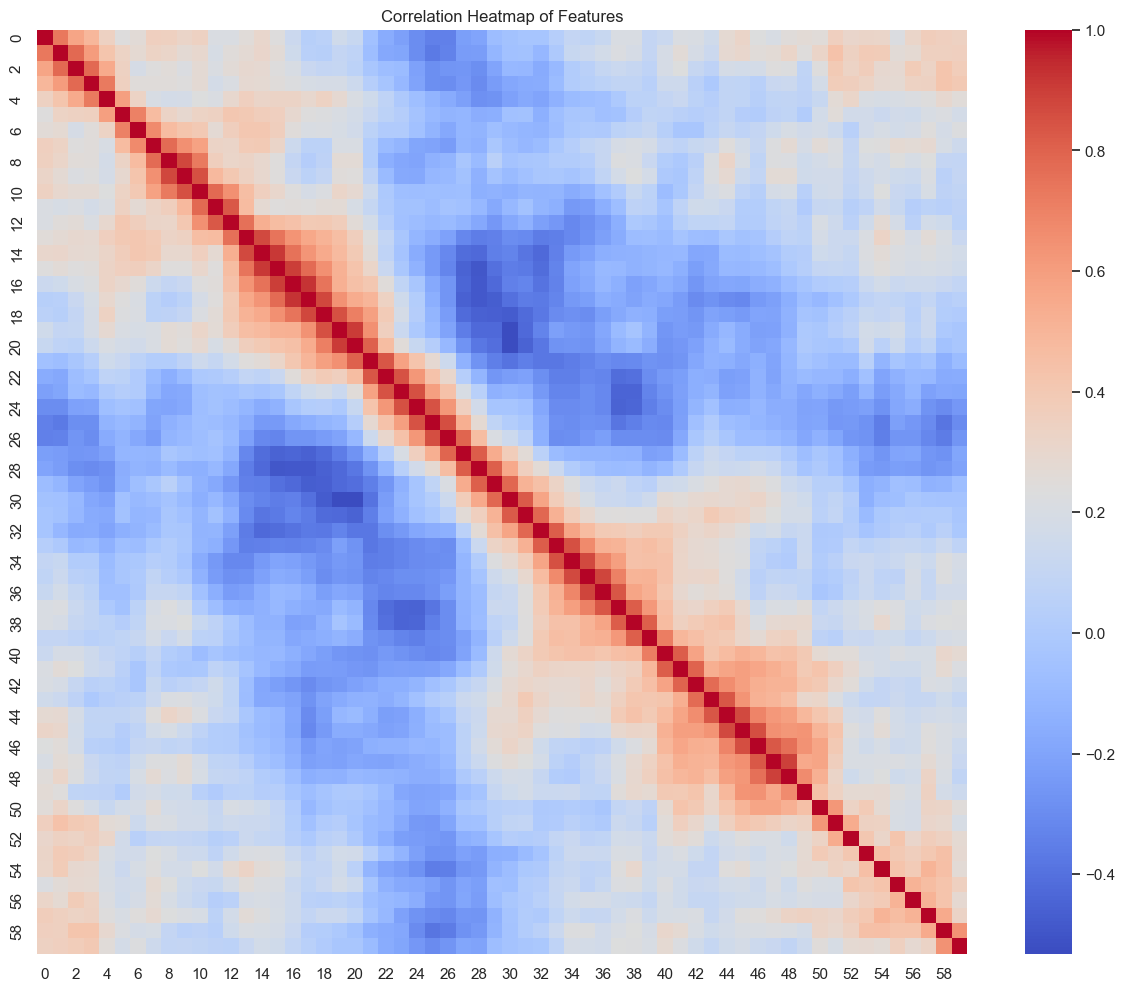

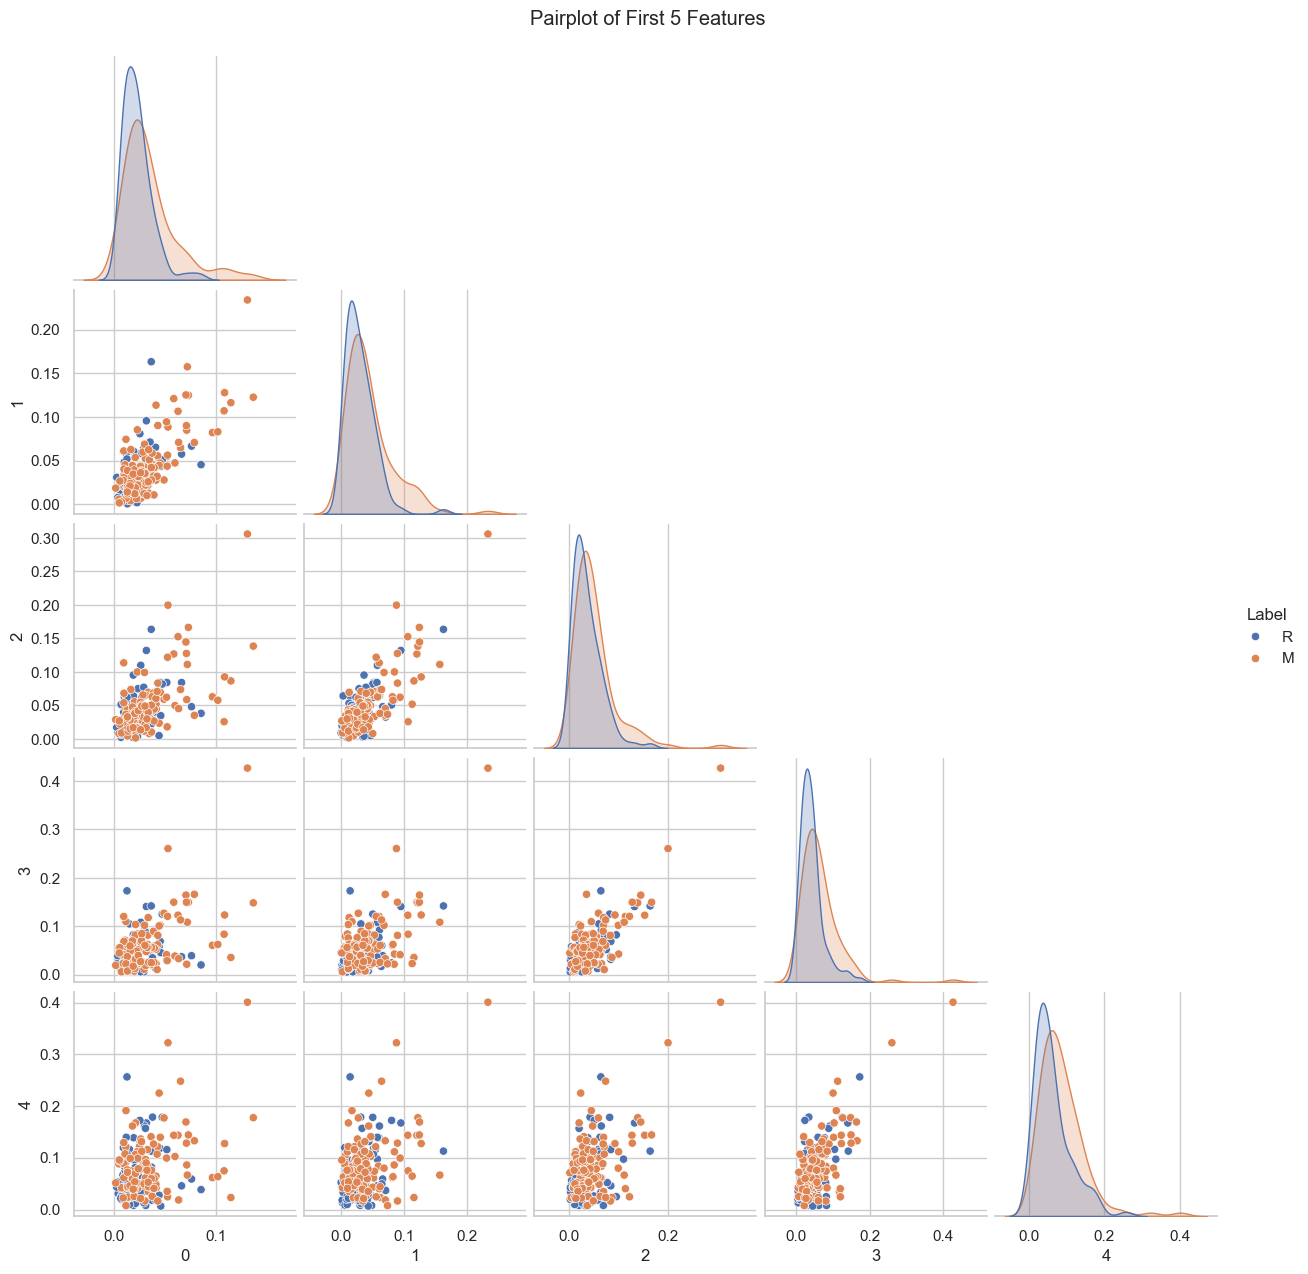

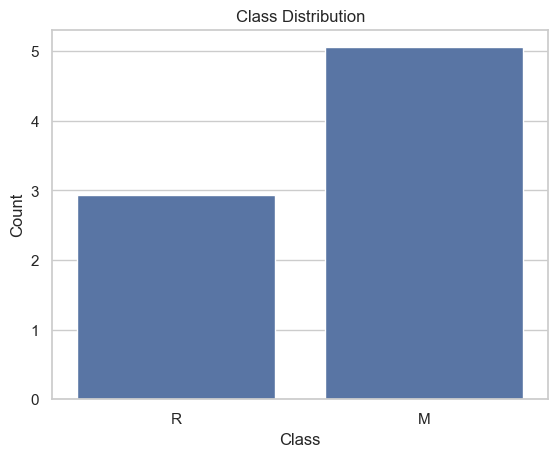

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
sonar_data = pd.read_csv('C:/Users/KIIT0001/Desktop/ML/.ML/resources/sonar data.csv', header=None)

# Rename the last column as 'Label' for clarity
sonar_data.columns = [i for i in range(60)] + ['Label']

# Correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(sonar_data.iloc[:, :-1].corr(), cmap='coolwarm', annot=False, cbar=True)
plt.title("Correlation Heatmap of Features")
plt.show()

# Pairplot of first 5 features with hue by class label
sns.pairplot(sonar_data[[0, 1, 2, 3, 4, 'Label']], hue='Label', corner=True)
plt.suptitle("Pairplot of First 5 Features", y=1.02)
plt.show()

# Class distribution
sns.countplot(x='Label', data=sonar_data)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
sonar_data.describe() #describe  -->  statistical measures of the data

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,0.236376,0.250666,0.273544,0.297689,0.321429,0.379217,0.416495,0.453055,0.504797,0.563449,0.609209,0.624841,0.648010,0.673223,0.675444,0.700148,0.702115,0.693473,0.641895,0.581871,0.506281,0.439903,0.416761,0.401535,0.390343,0.382597,0.362331,0.338353,0.324986,0.311385,0.290403,0.278269,0.246368,0.213053,0.196909,0.160738,0.122537,0.091217,0.051995,0.020366,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,0.132923,0.140264,0.141262,0.164075,0.205158,0.232975,0.264213,0.261947,0.258614,0.263225,0.258434,0.256373,0.250335,0.239555,0.245520,0.237768,0.246252,0.237631,0.240818,0.220864,0.212917,0.213389,0.206907,0.230499,0.257756,0.262755,0.239546,0.212655,0.199210,0.179076,0.170717,0.169137,0.139308,0.132795,0.151924,0.134254,0.087155,0.062496,0.036029,0.013673,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,0.128200,0.133450,0.165750,0.176100,0.166500,0.195900,0.205500,0.241950,0.299050,0.350450,0.397550,0.406350,0.455250,0.540450,0.524800,0.543550,0.529800,0.533950,0.461300,0.414250,0.349300,0.284100,0.257350,0.217550,0.178550,0.154000,0.160000,0.174250,0.172450,0.185900,0.164100,0.158700,0.155200,0.126850,0.094450,0.068400,0.064200,0.044950,0.026300,0.011500,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,0.225100,0.249700,0.265500,0.281900,0.284000,0.307500,0.306800,0.370900,0.434800,0.543000,0.627500,0.667000,0.700700,0.701200,0.722100,0.754500,0.753900,0.731700,0.682500,0.607400,0.490600,0.430300,0.390300,0.349700,0.310800,0.319500,0.303900,0.310400,0.282900,0.279000,0.260500,0.244400,0.221100,0.177600,0.147300,0.121100,0.101500,0.077700,0.044900,0.017900,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,0.301800,0.331600,0.351500,0.386950,0.453050,0.536050,0.660050,0.679100,0.731900,0.809450,0.818050

In [ ]:
sonar_data[60].value_counts()

,count
60,
M,111
R,97




Labels: 'R' --> Rock
        'M' --> Mine

Features are numerical and normalized.

In [ ]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,0.289581,0.301459,0.314426,0.320692,0.331182,0.380999,0.415007,0.455882,0.538062,0.617941,0.667426,0.672325,0.676701,0.689165,0.681204,0.706075,0.714754,0.712269,0.650283,0.581796,0.482378,0.428049,0.396577,0.36614,0.337553,0.318553,0.317034,0.331608,0.336365,0.305221,0.292594,0.300975,0.276883,0.248106,0.245225,0.198804,0.146917,0.110594,0.063708,0.022721,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,0.174713,0.191589,0.226249,0.268963,0.307636,0.375611,0.417100,0.448240,0.466762,0.500229,0.542270,0.569290,0.612959,0.653761,0.668809,0.692762,0.687737,0.673145,0.632680,0.579934,0.529762,0.451619,0.440841,0.44568,0.455530,0.460710,0.417330,0.348868,0.313709,0.318057,0.285428,0.252338,0.211822,0.175132,0.142312,0.116949,0.094458,0.069488,0.038449,0.017796,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


Separating the data and the labels

In [ ]:
X=sonar_data.drop(columns=60,axis=1)
Y=sonar_data[60]

Training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (166, 60) (42, 60)


Model Training --> Logistic Regression

In [ ]:
model=LogisticRegression()

In [ ]:
#training the model

model.fit(X_train,Y_train)

LogisticRegression()

Evaluating the accuracy score

In [ ]:
# prediction on training data

X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print("Accuracy score on training data: ",training_data_accuracy)

Accuracy score on training data:  0.8433734939759037


In [ ]:
# prediction on test data

X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Accuracy score on test data: ",test_data_accuracy)

Accuracy score on test data:  0.6904761904761905


Making a predictive system

In [ ]:
input_data = (0.0283,0.0599,0.0656,0.0229,0.0839,0.1673,0.1154,0.1098,0.1370,0.1767,0.1995,0.2869,0.3275,0.3769,0.4169,0.5036,0.6180,0.8025,0.9333,0.9399,0.9275,0.9450,0.8328,0.7773,0.7007,0.6154,0.5810,0.4454,0.3707,0.2891,0.2185,0.1711,0.3578,0.3947,0.2867,0.2401,0.3619,0.3314,0.3763,0.4767,0.4059,0.3661,0.2320,0.1450,0.1017,0.1111,0.0655,0.0271,0.0244,0.0179,0.0109,0.0147,0.0170,0.0158,0.0046,0.0073,0.0054,0.0033,0.0045,0.0079)

#changing data to a numpy array
input_array=np.asarray(input_data)

#reshaping the numpy array as we are predicting for one instance
input_array_reshaped=input_array.reshape(1,-1)

#making the prediction
prediction=model.predict(input_array_reshaped)
print(prediction)

# Interpret the prediction
if prediction[0] == 'R':
  print('The object is a Rock')
else:
  print('The object is a Mine')

['M']
The object is a Mine


In [ ]:
import os
import shutil

# Create folders
os.makedirs("Diabetes_Prediction", exist_ok=True)
os.makedirs("Rock_Mine_Classification", exist_ok=True)
os.makedirs("Spam_Mail_Prediction", exist_ok=True)

# Move files
shutil.move("Rock_Mine_using_SONAR_Data.ipynb", "Rock_Mine_Classification/Rock_Mine_using_SONAR_Data.ipynb")
shutil.move("Spam_Mail_Prediction.ipynb", "Spam_Mail_Prediction/Spam_Mail_Prediction.ipynb")

# If your datasets are present in Colab, also move them
# shutil.move("diabetes.csv", "Diabetes_Prediction/diabetes.csv")
# shutil.move("sonar.csv", "Rock_Mine_Classification/sonar.csv")
# shutil.move("spam.csv", "Spam_Mail_Prediction/spam.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Rock_Mine_using_SONAR_Data.ipynb'